# Random Projections

We will write functions that will implement randomprojections.

## 1. Orthogonal Projections

Recall that for projection of a vector $\boldsymbol x$ onto a 1-dimensional subspace $U$ with basis vector $\boldsymbol b$ we have

$${\pi_U}(\boldsymbol x) = \frac{\boldsymbol b\boldsymbol b^T}{{\lVert\boldsymbol  b \rVert}^2}\boldsymbol x $$

And for the general projection onto an M-dimensional subspace $U$ with basis vectors $\boldsymbol b_1,\dotsc, \boldsymbol b_M$ we have

$${\pi_U}(\boldsymbol x) = \boldsymbol B(\boldsymbol B^T\boldsymbol B)^{-1}\boldsymbol B^T\boldsymbol x $$

where 

$$\boldsymbol B = [\boldsymbol b_1,...,\boldsymbol b_M]$$


Your task is to implement orthogonal projections. We can split this into two steps
1. Find the projection matrix $\boldsymbol P$ that projects any $\boldsymbol x$ onto $U$.
2. The projected vector $\pi_U(\boldsymbol x)$ of $\boldsymbol x$ can then be written as $\pi_U(\boldsymbol x) = \boldsymbol P\boldsymbol x$.

To perform step 1, you need to complete the function `projection_matrix_1d` and `projection_matrix_general`. To perform step 2, complete `project_1d` and `project_general`.

In [1]:
import numpy as np

### Projection (1d)


In [2]:
def projection_matrix_1d(b):
    """Compute the projection matrix onto the space spanned by `b`
    Args:
        b: ndarray of dimension (D,), the basis for the subspace
    
    Returns:
        P: the projection matrix
    """
    P = (b@b.T) / np.linalg.norm(b)**2

    return P

With the help of the function `projection_matrix_1d`, you should be able 
to implement `project_1d`.

In [3]:
def project_1d(x, b):
    """Compute the projection matrix onto the space spanned by `b`
    Args:
        x: the vector to be projected
        b: ndarray of dimension (D,), the basis for the subspace
    
    Returns:
        y: ndarray of shape (D,) projection of x in space spanned by b
    """
    p = projection_matrix_1d(b)@x

    return p


### Projection (ND)

In [4]:
def projection_matrix_general(B):
    """Compute the projection matrix onto the space spanned by the columns of `B`
    Args:
        B: ndarray of dimension (D, M), the basis for the subspace
    
    Returns:
        P: the projection matrix
    """
    P = B@np.linalg.inv(B.T@B)@B.T
    
    return P

In [5]:
def project_general(x, B):
    """Compute the projection matrix onto the space spanned by the columns of `B`
    Args:
        x: ndarray of dimension (D, 1), the vector to be projected
        B: ndarray of dimension (D, M), the basis for the subspace
    
    Returns:
        p: projection of x onto the subspac spanned by the columns of B; size (D, 1)
    """
    p = projection_matrix_general(B)@x

    return p

# Project digits images
In this part we load some persian digits data to perform projection to.

In [6]:
load_limit = 100

def load_data(filename):
    fh = open(filename, 'r')
    file_length = len(fh.readlines())
    fh.seek(0, 0)
    data = np.zeros(shape=(min(load_limit, file_length), 1200))
    for i, line in enumerate(fh):
        if i == min(load_limit, file_length):
            break
        a_list = line.split(',')
        map_object = map(int, a_list)
        data[i] = list(map_object)
    fh.close()
    return data

`show_image` will convert (1200, 1) vector into the image

In [7]:
import matplotlib.pyplot as plt
def show_image(vector, save_path='no'):  # the input is a 1 * 1200 vector and should convert to a 40 * 30 image
    vector = vector.reshape(40, 30) * 255
    plt.imshow(vector, cmap='Greys_r', vmin=0, vmax=255)
    if save_path != 'no':
        plt.savefig(save_path)
    plt.show()

first 5 images:

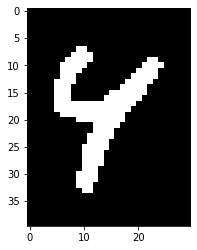

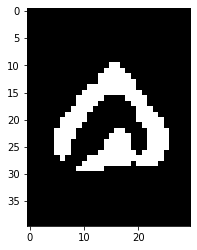

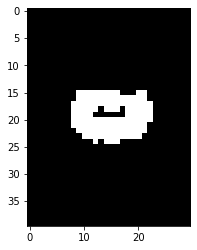

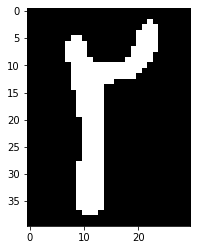

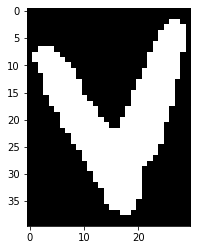

In [8]:
a = load_data("TrainData.txt")
for i in range(5):
    show_image(a[i])

## project to random B
in this part we want to project first 5 images into a random numpy array with shape=(1200, x)

find the minimum of x that images still can be verified

(1200,)


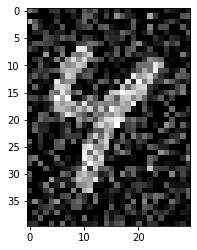

(1200,)


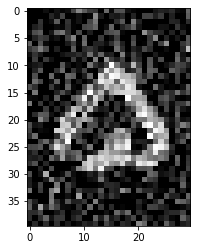

(1200,)


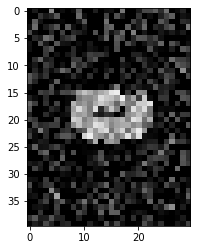

(1200,)


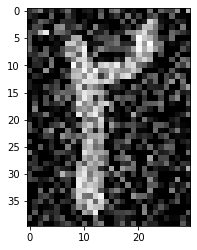

(1200,)


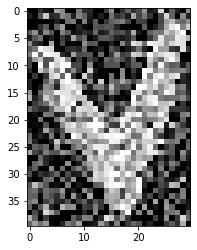

In [9]:
x = 600

for img in a[:5]:
    v = np.random.random(size=(1200, x))
    print(img.shape)
    show_image(project_general(img, v))